<a href="https://colab.research.google.com/github/Siri2191/Project-Cartola/blob/main/Distribui%C3%A7%C3%A3o_de_Poisson_para_predi%C3%A7%C3%A3o_probabilidades_de_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>  Usando a distribuição de Poisson para descrever as probabilidades de vitoria de cada jogo</h1>

## <h2>O que irá precisar</h2>

In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


##<h2>Lendo os arquivos</h2>

In [3]:
partidas_acumuladas = pd.read_excel('partidas_acumulado.xlsx')
partidas_acumuladas.drop(columns = 'Unnamed: 0', inplace=True)
partidas_acumuladas.head()

,Rodada,CasaID,VisitanteID,PlacarCasa,PlacarVisitante,ano,Resultado
0,1,São Paulo - SP,Flamengo - RJ,2,1,2015,CASA
1,1,Palmeiras - SP,Atlético - MG,2,2,2015,EMPATE
2,1,Fluminense - RJ,Joinville - SC,1,0,2015,CASA
3,1,Vasco da Gama - RJ,Goiás - GO,0,0,2015,EMPATE
4,1,Grêmio - RS,Ponte Preta - SP,3,3,2015,EMPATE


##<h2>Calculando as medias de gols de cada time como visitante e jogando em casa</h2>

In [35]:

media_gols_visitantes_times = partidas_acumuladas.groupby('VisitanteID')['PlacarVisitante'].mean()
media_gols_casa_times = partidas_acumuladas.groupby('CasaID')['PlacarCasa'].mean()
media_gols_visitantes_times[1]

0.9473684210526315

##<h2>Distribuição de poisson para times que jogam fora de casa</h2>

In [75]:
media_gols_visitantes_times.index

Index(['América - MG', 'Atlético - GO', 'Atlético - MG', 'Atlético - PR',
       'Avaí - SC', 'Bahia - BA', 'Botafogo - RJ', 'Bragantino - SP', 'CSA',
       'Ceará - CE', 'Chapecoense - SC', 'Corinthians - SP', 'Coritiba - PR',
       'Cruzeiro - MG', 'Figueirense - SC', 'Flamengo - RJ', 'Fluminense - RJ',
       'Fortaleza', 'Goiás - GO', 'Grêmio - RS', 'Internacional - RS',
       'Joinville - SC', 'Palmeiras - SP', 'Paraná - PR', 'Ponte Preta - SP',
       'Santa Cruz - PE', 'Santos - SP', 'Sport - PE', 'São Paulo - SP',
       'Vasco da Gama - RJ', 'Vitória - BA'],
      dtype='object', name='VisitanteID')

In [59]:
qnt_gols = range(0,partidas_acumuladas[['PlacarCasa','PlacarVisitante']].max()[1]) 

def prob_poisson(dominio, media):
  prob_poisson = []
  for i in dominio:
    k = dominio[i]
    prob = (math.exp((-1)*media)*(media**k))/(math.factorial(k))
    prob_poisson.append(prob)
  
  return prob_poisson

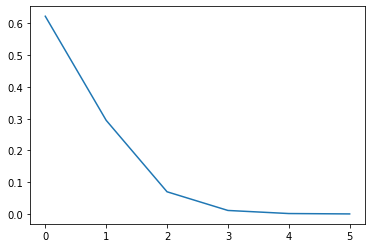

In [64]:
prob = prob_poisson(qnt_gols,media_gols_visitantes_times[0])
plt.plot(qnt_gols,prob)

In [68]:
prob

[0.6227038648477501,
 0.29496498861209214,
 0.06986012888181128,
 0.011030546665549151,
 0.0013062489472360835,
 0.00012374990026447105]

In [83]:
dicionario={}
for time in range(0,len(media_gols_visitantes_times)):
  prob=prob_poisson(qnt_gols,media_gols_visitantes_times[time])
  dicionario[media_gols_visitantes_times.index[time]]=prob

prob_visit = pd.DataFrame(dicionario).transpose()

prob_visit

,0,1,2,3,4,5
América - MG,0.622704,0.294965,0.069860,0.011031,0.001306,0.000124
Atlético - GO,0.387760,0.367352,0.174009,0.054950,0.013015,0.002466
Atlético - MG,0.290300,0.359055,0.222047,0.091546,0.028307,0.007002
Atlético - PR,0.446187,0.360081,0.145296,0.039085,0.007886,0.001273
Avaí - SC,0.570408,0.320229,0.089889,0.016821,0.002361,0.000265
Bahia - BA,0.403373,0.366220,0.166245,0.050311,0.011419,0.002073
Botafogo - RJ,0.454084,0.358487,0.141508,0.037239,0.007350,0.001160
Bragantino - SP,0.430803,0.362781,0.152750,0.042877,0.009027,0.001520
CSA,0.691826,0.254883,0.046952,0.005766,0.000531,0.000039
Ceará - CE,0.355195,0.367658,0.190279,0.065652,0.016989,0.003517


## Distribuição de Poisson para times que jogam em casa

In [84]:

dicionario={}
for time in range(0,len(media_gols_casa_times)):
  prob=prob_poisson(qnt_gols,media_gols_casa_times[time])
  dicionario[media_gols_casa_times.index[time]]=prob

prob_casa = pd.DataFrame(dicionario).transpose()

prob_casa

,0,1,2,3,4,5
América - MG,0.387760,0.367352,0.174009,0.054950,0.013015,0.002466
Atlético - GO,0.331124,0.365979,0.202251,0.074514,0.020589,0.004551
Atlético - MG,0.174538,0.304676,0.265923,0.154733,0.067526,0.023575
Atlético - PR,0.215437,0.330714,0.253838,0.129888,0.049847,0.015304
Avaí - SC,0.408715,0.365692,0.163599,0.048793,0.010914,0.001953
Bahia - BA,0.229080,0.337592,0.248752,0.122194,0.045019,0.013269
Botafogo - RJ,0.307602,0.362647,0.213771,0.084008,0.024760,0.005838
Bragantino - SP,0.167048,0.298928,0.267462,0.159539,0.071373,0.025544
CSA,0.408715,0.365692,0.163599,0.048793,0.010914,0.001953
Ceará - CE,0.331124,0.365979,0.202251,0.074514,0.020589,0.004551
